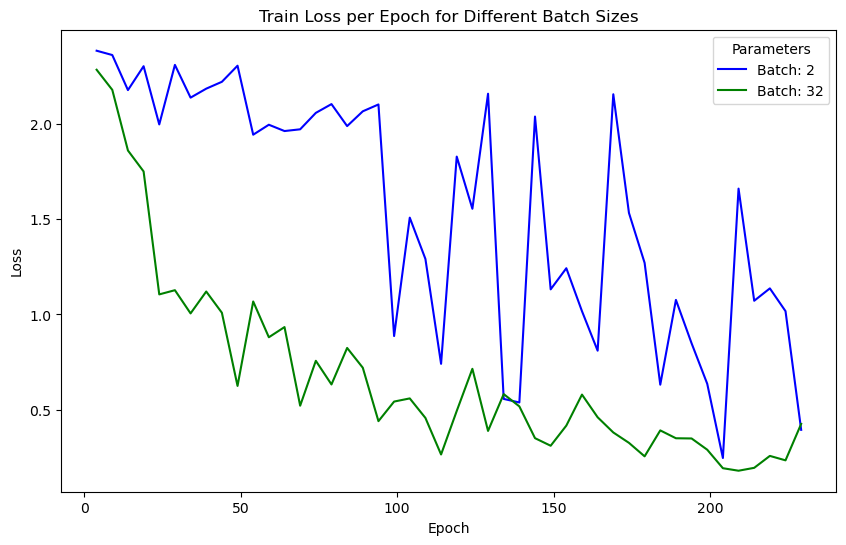

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_batch2 = pd.read_csv("./../docs/results/transfer_model_train_loss_batch_2.csv")
df_batch32 = pd.read_csv("./../docs/results/transfer_model_train_loss_batch_32.csv")

# Pivot the tables to properly format the data for plotting
df_batch2 = df_batch2.pivot_table(
    values="value", index="step", columns="key", aggfunc="first"
)
df_batch32 = df_batch32.pivot_table(
    values="value", index="step", columns="key", aggfunc="first"
)

# Find the maximum step in the batch 32 data
max_step_batch32 = df_batch32.index.max()

# Filter batch 2 data to match the duration of batch 32
df_batch2 = df_batch2[df_batch2.index <= max_step_batch32]

# Reshape the dataframes for seaborn's lineplot function
plot_data_batch2 = df_batch2.reset_index().melt(
    id_vars=["step"], value_vars=["train_loss"], var_name="Type", value_name="Loss"
)
plot_data_batch32 = df_batch32.reset_index().melt(
    id_vars=["step"], value_vars=["train_loss"], var_name="Type", value_name="Loss"
)

# Add a new column to distinguish the batch sizes
plot_data_batch2["Batch"] = "Batch: 2"
plot_data_batch32["Batch"] = "Batch: 32"

# Concatenate the two dataframes
combined_data = pd.concat([plot_data_batch2, plot_data_batch32])

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="step",
    y="Loss",
    hue="Batch",
    data=combined_data,
    palette=["blue", "green"],
    markers=True,
)
plt.title("Train Loss per Epoch for Different Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Parameters")

# Save the plot
plt.savefig("./images/combined_transfer_batch_loss.png")
plt.show()